# Analisi statistica dei dati relativi al decadimento della particella K*

## 1. Introduzione
La particella K* è altamente instabile, e ha una vita media di 10<sup>-11</sup> secondi. Per questo motivo, se ne si vuole provarne l'esistenza si è costretti a ricorrere a metodi statistici, piuttosto che a a metodi di rilevamento diretto; questo è lo scopo della presente esperienza di laboratorio. L'analisi statistica che è stata svolta è basata su dati ottenuti tramite una simulazione. In particolare, il codice che è stato scritto scritto si occupa di:

1. Simulare degli eventi di collisione dell'esperimento _ALICE_ tramite il metodo di generazione Montecarlo.
2. Analizzare i dati raccolti, dimostrare l'esistenza della particella K* e verificare i risultati ottenuti con un istogramma di controllo.

## 2. Struttura del codice
Il codice di simulazione è stato realizzato in _C++_ e fa un uso intensivo delle librerie _ROOT_. È stato scelto un approccio diverso da quello consigliato, in modo da espandere ancora di più le possibilità di reimpiego del codice. Segue una breve descrizione di quello che è stato sviluppato.

### 2.1. Classi implementate
Sono state implementate due classi virtuali: `Entity` ed `Experiment`.

- #### Entity
  Una _Entity_ rappresenta una generica entità rilevabile da un esperimento (i.e. particella o risonanza), a cui sono associate una quantità di moto, una carica e una massa. Una _Entity_ può essere solo di un numero finito di tipi, ognuno definito da tre proprietà: carica, massa e larghezza di risonanza (quest'ultima esiste solo per le risonanze). Ogni tipo è implementato tramite una classe derivata di `Entity`, in cui sono dichiarate le rispettive proprietà; per risparmiare memoria, sono dichiarate come `static`.  
  I metodi e le proprietà condivise tra tutti i tipi, invece, sono salvati nella classe base `Entity`.
  
- #### Experiment
  La classe `Experiment` rappresenta un esperimento dell'_LHC_. Il codice che si occupa di simulare gli eventi di collisione e raccogliere i dati risiede qua. Per dare la possibilità di riutilizzare questo programma per esperimenti diversi, ogni esperimento è implementato tramite una classe derivata di `Experiment`. L'esperimento che interessa a noi è implementato in `KaonSDecay` ed è descritto accuratamente in <ins>[3. Generazione di dati]</ins>.

### 2.2. Meccanismi di reimpiego
Il polimorfismo dinamico ha reso possibile sviluppare il codice con una struttura modulare. Per aggiungere nuovi tipi di particelle o esperimenti, basta semplicemente aggiungere un file in cui se ne definiscono le proprietà. Tutto questo è stato realizzato prestando particolare attenzione all'utilizzo delle risorse di calcolo: non sono presenti né dati duplicati né linee di codice ridondanti.

Il codice usato per la simulazione dei dati è disponibile interamente su
GitHub\[1\], insieme ad ulteriori informazioni e istruzioni per la
compilazione.

\[1\]: https://github.com/P2-718na/ALICE-simulation

## 3. Generazione dei dati

### 3.1. Funzionamento del programma
Il numero di eventi di un esperimento di _ALICE_ è dell'ordine di 10<sup>5</sup>-10<sup>7</sup>, ognuno dei quali conta 10<sup>2</sup>-10<sup>4</sup> particelle. Il programma simula gli eventi uno ad uno, svolgendo le seguenti operazioni:

1. Viene generato un certo numero di particelle <ins>[3.2. Generazione delle particelle]</ins>.
2. Vengono fatte decadere le particelle instabili <ins>[3.3. Decadimenti]</ins>.
3. Vengono inseriti tutti i dati raccolti in un istogramma di _ROOT_.
4. Viene ripulita la memoria prima dell'evento successivo.

### 3.2. Generazione delle particelle
In ogni evento, è presente solo un numero limitato di tipi di particelle, tutte indistingubili tra loro. Per la loro generazione, quindi, si è tenuto conto solamente di:

- _PDF_ della distribuzione dei momenti delle particelle, come descritto in tabella <ins>[A.1]</ins>.
- Frequenza relativa con cui appare ogni tipo di particella, come descritto in tabella <ins>[A.2]</ins>.

Tutte le particelle generate vengono salvate in memoria fino alla simulazione dell'evento successivo.
Per generare numeri secondo distribuzioni di probabilità, sono stati usati i metodi della classe `TRandom3` di _ROOT_.

### 3.3. Decadimenti
Non appena è generata una particella K*, viene rimossa e sostituita da una coppia $\pi$/$\kappa$ di segno opposto, per simulare il processo di decadimento. I prodotti del decadimento hanno la stessa energia della particella madre, divisa in modo casuale tra di loro.

Per consentire la creazione di un istogramma di controllo, questi vengono marchiati, così da poterli distinguere dalle particelle generate normalmente. In un esperimento reale non sarebbe possibile distinguere tra particelle prodotte dal decadimento e particelle generate da una collisione.

## 4. Analisi dei dati

### 4.1. Correttezza dei dati generati
I dati generati sono congruenti con quanto ci si aspettava. Segue un analisi più dettagliata degli istogrammi ottenuti.

- #### Abbondanza delle particelle
  Il numero di particelle generato corrisponde con quanto inserito nei dati di input. La percentuale di occorrenze di ogni singola particella è compatibile con quanto specificato nel programma. I dati sono riassunti in <ins>[B.3]</ins> e <ins>[A.3]</ins>

  1. Verifichiamo che il numero di ingressi sia dell'ordine di 10<sup>7</sup>. Il numero di ingressi può variare visto che, quando viene generata una K*, questa decade. I prodotti del decadimento sono considerati solo negli istogrammi di massa invariante, mentre le risonanze K* vengono considerate solo nei rimanenti istogrammi.

Il numero è corretto, e può essere visualizzato negli istogrammi che seguono.

  2. Verifichiamo che i tipi di particelle generate seguono le proporzioni fissate, entro gli errori statistici.

  3. Verifichiamo che le distribuzioni angolari siano uniformi:

In [1]:
TF1* angleFit = new TF1("angleFit", "[0]", 10000);

angleFit->SetParNames("A");

In [2]:
AzimuthAngleDist->Fit(angleFit, "Q");

AzimuthAngleDist->SetFillColor(7);
AzimuthAngleDist->Draw();
angleFit->Draw("SAME");

cv->Draw();

input_line_51:2:3: error: use of undeclared identifier 'AzimuthAngleDist'
 (AzimuthAngleDist->Fit(((*(class TF1 **)0x1174720f0)), "Q"))
  ^
Error in <HandleInterpreterException>: Error evaluating expression (AzimuthAngleDist->Fit(((*(class TF1 **)0x1174720f0)), "Q")).
Execution of your code was aborted.


In [3]:
PolarAngleDist->Fit(angleFit, "Q");

PolarAngleDist->SetFillColor(7);
PolarAngleDist->Draw();
angleFit->Draw("SAME");

cv->Draw();

input_line_53:2:3: error: use of undeclared identifier 'PolarAngleDist'
 (PolarAngleDist->Fit(((*(class TF1 **)0x1174720f0)), "Q"))
  ^
Error in <HandleInterpreterException>: Error evaluating expression (PolarAngleDist->Fit(((*(class TF1 **)0x1174720f0)), "Q")).
Execution of your code was aborted.


  Eseguendo un fit uniforme `y = A` dei due grafici, otteniamo valori coerenti con una distribuzione uniforme:
  
|   Grafico        | Parametro | Valore atteso | Valore ottenuto |
|------------------|-----------|---------------|-----------------|
| Angolo azimutale | A         | 10<sup>5</sup>| 99,990 ± 30     | 
| Angolo polare    | A         | 10<sup>5</sup>| 99,990 ± 30     |

  4. Verifichiamo che la distribuzione dell'impulso sia una funzione esponenziale con media 1: 

In [4]:
MomentumDist->SetFillColor(7);
MomentumDist->Fit("expo");
MomentumDist->Draw();

cv->Draw();

input_line_55:2:3: error: use of undeclared identifier 'MomentumDist'
 (MomentumDist->SetFillColor(7))
  ^
Error in <HandleInterpreterException>: Error evaluating expression (MomentumDist->SetFillColor(7)).
Execution of your code was aborted.


Eseguendo un fit esponenziale del grafico, otteniamo valori coerenti con una distribuzione esponenziale. In particolare, il parametro `t = -1 / Slope` vale:

|   Grafico | Parametro | Valore atteso | Valore ottenuto |
|-----------|-----------|---------------|-----------------|
| Momento   | 7         | 1             | 1.000 ± 0.001   | 

### 2. Analisi degli istogrammi di massa invariante
Analizziamo gli istogrammi della massa invariante, calcolata rispetto a diverse coppie di particelle. Importiamo gli istrogrammi:

In [5]:
TH1F* InvMassOppCharge    = (TH1F*)histograms->Get("InvMassOppCharge");    // (1)
TH1F* InvMassSameCharge   = (TH1F*)histograms->Get("InvMassSameCharge");   // (2)
TH1F* InvMassPKOppCharge  = (TH1F*)histograms->Get("InvMassPKOppCharge");  // (3)
TH1F* InvMassPKSameCharge = (TH1F*)histograms->Get("InvMassPKSameCharge"); // (4)
TH1F* InvMassPKCouple     = (TH1F*)histograms->Get("InvMassPKCouple");     // (5)

input_line_57:2:11: error: use of undeclared identifier 'histograms'
 ((TH1F *)histograms->Get("InvMassOppCharge"))
          ^
Error in <HandleInterpreterException>: Error evaluating expression ((TH1F *)histograms->Get("InvMassOppCharge")).
Execution of your code was aborted.


Nota: l'istogramma (5) è un istogramma di controllo, e non sarebbe ottenibile nel mondo reale. Il motivo è che questo istogramma raccoglie la massa invariante calcolata _solo tra le coppie di particelle generate dai decadimenti_. Grazie alla nostra simulazione, è facile risalire a quali sono queste coppie, ma nel mondo reale ciò sarebbe impossiible.

  1. Sappiamo che dal decadimento della K*, si generano coppie Pione-Kaone di segno opposto (come conseguenza della legge di conservazione della carica). Questo significa che, tra tutte le particelle generate, il numero di coppie  Pione-Kaone di segno opposto sarà leggermente più alto di quelle di segno concorde. Di conseguenza, sottraendo il grafico (4) dal (3), ci aspettiamo di ottenere un picco in corrispondenza della massa della K*, consistente con il grafico (5).

In [6]:
TH1F* InvMassPKSubtract = new TH1F(*InvMassPKSameCharge) ;
InvMassPKSubtract->SetTitle("InvMassPKSubtract");
InvMassPKSubtract->Add(InvMassPKSameCharge, InvMassPKOppCharge, -1, 1); // (3) - (4)

TCanvas* cv2 = new TCanvas();
cv2->Divide(2, 1);

cv2->cd(1);
InvMassPKSubtract->SetFillColor(7);
InvMassPKSubtract->SetAxisRange (0.4, 1.4);
InvMassPKSubtract->Draw("hist");

cv2->cd(2);
InvMassPKCouple->SetFillColor(7);
InvMassPKCouple->Draw("hist");
cv2->Draw();

[/Users/matteo/local/root/root_v6.24.06/lib/libCling.so] cling_runtime_internal_throwIfInvalidPointer (no debug info)
[<unknown binary>] (no debug info)
[<unknown binary>] (no debug info)
[/Users/matteo/local/root/root_v6.24.06/lib/libCling.so] cling::IncrementalExecutor::executeInit(llvm::StringRef) const (no debug info)
[/Users/matteo/local/root/root_v6.24.06/lib/libCling.so] cling::IncrementalExecutor::runStaticInitializersOnce(cling::Transaction&) (no debug info)
[/Users/matteo/local/root/root_v6.24.06/lib/libCling.so] cling::Interpreter::executeTransaction(cling::Transaction&) (no debug info)
[/Users/matteo/local/root/root_v6.24.06/lib/libCling.so] cling::IncrementalParser::commitTransaction(llvm::PointerIntPair<cling::Transaction*, 2u, cling::IncrementalParser::EParseResult, llvm::PointerLikeTypeTraits<cling::Transaction*>, llvm::PointerIntPairInfo<cling::Transaction*, 2u, llvm::PointerLikeTypeTraits<cling::Transaction*> > >&, bool) (no debug info)
[/Users/matteo/local/root/root_

Error in <HandleInterpreterException>: Trying to dereference null pointer or trying to call routine taking non-null arguments.
Execution of your code was aborted.
input_line_58:2:38: warning: null passed to a callee that requires a non-null argument [-Wnonnull]
 TH1F* InvMassPKSubtract = new TH1F(*InvMassPKSameCharge) ;
                                     ^~~~~~~~~~~~~~~~~~~


I due istogrammi ottenuti sono consistenti, con un picco attorno al valore atteso di `0.89`.

  2. Eseguiamo la stessa operazione con i grafici (1) e (2). Ci aspettiamo dei risultati consistenti.

In [7]:
TH1F* InvMassSubtract = new TH1F(*InvMassSameCharge) ;
InvMassSubtract->SetTitle("InvMassSubtract");
InvMassSubtract->Add(InvMassSameCharge, InvMassOppCharge, -1, 1); // (1) - (2)

cv2->cd(1);
InvMassSubtract->SetFillColor(7);
InvMassSubtract->SetAxisRange(0.4, 1.4);
InvMassSubtract->Draw("hist");

cv2->cd(2);
InvMassPKSubtract->SetFillColor(7);
InvMassPKSubtract->SetAxisRange(0.4, 1.4);
InvMassPKSubtract->Draw("hist");
cv2->Draw();

[/Users/matteo/local/root/root_v6.24.06/lib/libCling.so] cling_runtime_internal_throwIfInvalidPointer (no debug info)
[<unknown binary>] (no debug info)
[<unknown binary>] (no debug info)
[/Users/matteo/local/root/root_v6.24.06/lib/libCling.so] cling::IncrementalExecutor::executeInit(llvm::StringRef) const (no debug info)
[/Users/matteo/local/root/root_v6.24.06/lib/libCling.so] cling::IncrementalExecutor::runStaticInitializersOnce(cling::Transaction&) (no debug info)
[/Users/matteo/local/root/root_v6.24.06/lib/libCling.so] cling::Interpreter::executeTransaction(cling::Transaction&) (no debug info)
[/Users/matteo/local/root/root_v6.24.06/lib/libCling.so] cling::IncrementalParser::commitTransaction(llvm::PointerIntPair<cling::Transaction*, 2u, cling::IncrementalParser::EParseResult, llvm::PointerLikeTypeTraits<cling::Transaction*>, llvm::PointerIntPairInfo<cling::Transaction*, 2u, llvm::PointerLikeTypeTraits<cling::Transaction*> > >&, bool) (no debug info)
[/Users/matteo/local/root/root_

Error in <HandleInterpreterException>: Trying to dereference null pointer or trying to call routine taking non-null arguments.
Execution of your code was aborted.
input_line_59:2:36: warning: null passed to a callee that requires a non-null argument [-Wnonnull]
 TH1F* InvMassSubtract = new TH1F(*InvMassSameCharge) ;
                                   ^~~~~~~~~~~~~~~~~


L'istogramma ottenuto sottraendo (2) da (1) è consistente con quello ottenuto sottraendo (4) da (3).

### 3. Analisi della massa della K*
Ora possiamo analizzare i grafici ottenuti. Ci aspettiamo che i grafici appena ottenuti seguano una distribuzione gaussiana, con media corrispondente alla massa di K* e sigma corrispondente alla vita media di K*.

Nota: se questi fossero dati reali, ci aspetteremmo una distribuzione _lorentziana_. Otteniamo una distribuzione gaussiana perchè durante la generazione dei dati, abbiamo usato un algoritmo semplificato per simulare il decadimento di K*, ottenendo questo comportamento.

In [8]:
cv->cd();

InvMassPKSubtract->Fit("gaus", "QB", "", 0, 2);
InvMassPKSubtract->Draw("hist");
cv->Draw();

input_line_61:2:3: error: use of undeclared identifier 'cv'
 (cv->cd())
  ^
Error in <HandleInterpreterException>: Error evaluating expression (cv->cd()).
Execution of your code was aborted.


La distribuzione gaussiana fitta perfettamente il grafico e i dati ottenuti sono coerenti con quelli attesi (entro le incertezze).

/*
hists_[TraverseMomentumDist] = std::make_unique<TH1F>("TraverseMomentumDist", "Traverse momentum", 500, 0, 4);
    hists_[EnergyDist]           = std::make_unique<TH1F>("EnergyDist", "Energy", 1000, 0, 6);
    hists_[InvMass]              = std::make_unique<TH1F>("InvMass", "Invariant mass", 500, 0, 8);
*/

## Appendice A: Tabelle

<table>
    <caption><b>Tabella A.1.</b> Parametri di generazione.</caption>
    <tr>
        <th>Parametro</th>
        <th>Valore</th>
    </tr>
    <tr>
        <td>n° eventi</td>
        <td>10<sup>5</sup></td>
    </tr>
    <tr>
        <td>n° particelle per evento</td>
        <td>100</td>
    </tr>
    <tr>
        <td><i>PDF</i> modulo del momento</td>
        <td>Esponenziale, media 1</td>
    </tr>
    <tr>
        <td><i>PDF</i> angoli azimutali e polari</td>
        <td>Uniforme</td>
    </tr>
</table>

<table>
    <caption><b>Tabella A.2.</b> Probabilità di generazione delle particelle, configurazione inserita nel programma.</caption>
    <tr>
        <th>Particella</th>
        <th>Probabilità relativa</th>
    </tr>
    <tr>
        <td>$\pi$+</td>
        <td>40.0%</td>
    </tr>
    <tr>
        <td>$\pi$-</td>
        <td>40.0%</td>
    </tr>
    <tr>
        <td>$\kappa$+</td>
        <td>5.0%</td>
    </tr>
    <tr>
        <td>$\kappa$-</td>
        <td>5.0%</td>
    </tr>
    <tr>
        <td>p+</td>
        <td>4.5%</td>
    </tr>
    <tr>
        <td>p-</td>
        <td>4.5%</td>
    </tr>
    <tr>
        <td>$\kappa$*</td>
        <td>1.0%</td>
    </tr>
</table>

<table>
    <caption><b>Tabella A.3.</b> Abbondanza delle particelle generate, cofrontata con il valore atteso. Le incertezze sui valori osservati sono valutate usando la regola della radice.</caption>
    <tr>
        <th>Particella</th>
        <th>Numero atteso ($10^5$ occorrenze)</th>
        <th>Numero ottenuto ($10^3$ occorrenze) </th>
        <th>Percentuale attesa</th>
        <th>Percentuale ottenuta</th>
    </tr>
    <tr>
        <td>$\pi$+</td>
        <td>40</td>
        <td>3999 $\pm$ 2</td>
        <td>40.0%</td>
        <td>40.0%</td>
    </tr>
    <tr>
        <td>$\pi$-</td>
        <td>40</td>
        <td>4000 $\pm$ 2</td>
        <td>40.0%</td>
        <td>40.0%</td>
    </tr>
    <tr>
        <td>$\kappa$+</td>
        <td>5</td>
        <td>500.3 $\pm$ 0.7</td>
        <td>5.0%</td>
        <td>5.0%</td>
    </tr>
    <tr>
        <td>$\kappa$-</td>
        <td>5</td>
        <td>500.1 $\pm$ 0.7</td>
        <td>5.0%</td>
        <td>5.0%</td>
    </tr>
    <tr>
        <td>p+</td>
        <td>4.5</td>
        <td>449.0 $\pm$ 0.7</td>
        <td>4.5%</td>
        <td>4.5%</td>
    </tr>
    <tr>
        <td>p-</td>
        <td>4.5</td>
        <td>450.7 $\pm$ 0.7</td>
        <td>4.5%</td>
        <td>4.5%</td>
    </tr>
    <tr>
        <td>$\kappa$*</td>
        <td>1</td>
        <td>100.5 $\pm$ 0.3</td>
        <td>1.0%</td>
        <td>1.0%</td>
    </tr>
    <tr>
        <td><b>Totale</b></td>
        <td>100</td>
        <td>10000 $\pm$ 7</td>
        <td>100.0%</td>
        <td>100.0%</td>
    </tr>
</table>

# Appendice B: Grafici

In [9]:
// Carica i dati salvati da file
TFile* histograms = new TFile("../histograms/kstar-decay-hist.root","READ");

// Importa i grafici necessari per [4.1]
TH1F* ParticleDist     = (TH1F*)histograms->Get("ParticleDist");
TH1F* AzimuthAngleDist = (TH1F*)histograms->Get("AzimuthAngleDist");
TH1F* PolarAngleDist   = (TH1F*)histograms->Get("PolarAngleDist");
TH1F* MomentumDist     = (TH1F*)histograms->Get("MomentumDist");

// Imposta lo stile
gStyle->SetOptFit(1111);
gStyle->SetOptStat("neM");

// Crea una canvas per visualizzare i grafici
TCanvas* cv = new TCanvas("cv", "", 1200, 700);

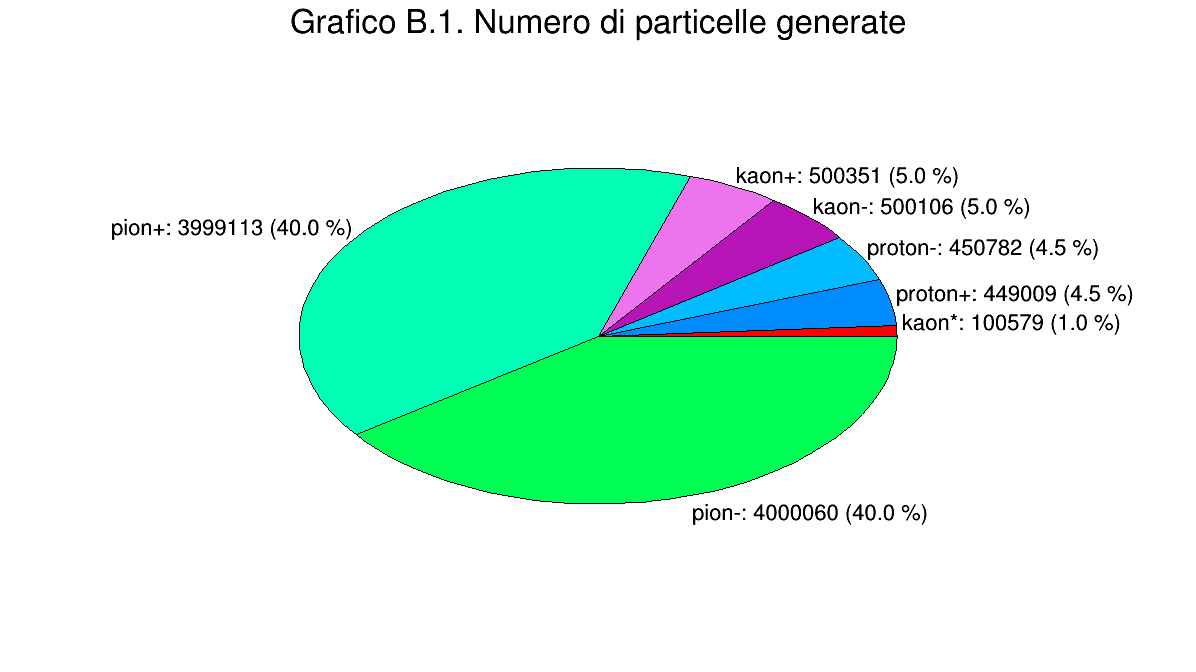

In [48]:
// Crea una pie per organizzare i dati
TPie particleDistPie(ParticleDist);

int colors[] = {2, 63, 65, 222, 224, 71, 75, 79};
particleDistPie.SetTitle("Grafico B.1. Numero di particelle generate");
particleDistPie.SetRadius(.25);
particleDistPie.SetValueFormat("%.0f");
particleDistPie.SetLabelFormat("%txt: %val (%perc)");
particleDistPie.SortSlices();
particleDistPie.SetFillColors(colors);

// Disegna grafico e canvas
particleDistPie.Draw();
cv->Draw();

__Grafico B.1.__ Numero di particelle generate.